In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df_은행 = pd.read_excel("은행_정규화.xlsx") ## 데이터 불러오기
df_연금 = pd.read_excel("연금_정규화.xlsx")
df_생활인구 = pd.read_excel("생활인구_정규화.xlsx")
df_독거노인 = pd.read_excel("독거노인_정규화.xlsx")
df_소득 = pd.read_excel("소득_정규화.xlsx")
df_기초생활 = pd.read_excel("기초생활보장수급자_정규화.xlsx")
df_요양기관 = pd.read_excel("요양기관_정규화.xlsx")

In [3]:
## 은행분포 : 값이 낮을수록 은행 분포가 낮고 값이 높을수록 은행 분포가 높도록 설정
df_은행["행정동별은행분포"]=1-df_은행["행정동별은행합계"] 
#df_은행

In [4]:
df_은행["행정동코드"] = df_연금["행정동코드"]
df_은행["행정동코드"] = df_소득["행정동코드"]
df_은행["행정동코드"] = df_독거노인["행정동코드"]
df_은행["행정동코드"] = df_생활인구["행정동코드"]
df_은행["행정동코드"] = df_요양기관["행정동코드"]
df_은행["행정동코드"] = df_기초생활["행정동코드"]

In [5]:
#TargetA 가중치
df_은행["TargetA밀도"] =df_독거노인["행정동별독거노인합계"]*0.25+df_요양기관["행정동별요양기관정원"]*0.25+ df_기초생활["행정동별기초생활보장수급자합계"]*0.5
#['행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생  보장수급자합계', '행정동별은행합계
#TargetB 가중치
df_은행["TargetB밀도"] = df_소득["행정동별평균소득"]*0.5 + df_연금["행정동별연금평균"]*0.25 +df_생활인구["행정동별생활인구합계"]*0.25
#Index(['행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계'], dtype='object')

In [6]:
#df_은행

In [7]:
# KMeans (TargetA)

In [8]:
X_a = df_은행[["행정동별은행분포","TargetA밀도"]]
#X_a 

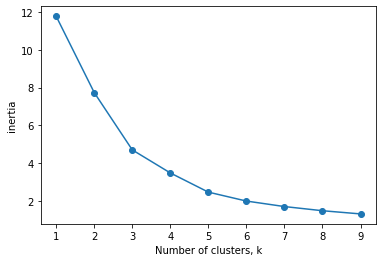

In [9]:
# Inertia value를 이용한 적정 군집수 판단

ks = range(1,10) # 1부터 10까지의 군집을 가지고 있을때

inertias = []



for k in ks:

    kMeans = KMeans(n_clusters=k)

    kMeans.fit(X_a)

    inertias.append(kMeans.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show() 


In [10]:
# 3 에서 5까지 변화의 값이 크지않다. 그러므로 3개에서 5개 사이의 클러스터를 가졌을때 적절하다
# k = 3로 설정
kMeans = KMeans(n_clusters=4,algorithm='auto')
kMeans.fit(X_a)

y_kmed = kMeans.fit_predict(X_a)

predict_a4 = pd.DataFrame(kMeans.predict(X_a))
predict_a4.columns=['predict_a4']

y_kmed

array([2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 0, 2, 3, 0, 0, 3, 1, 1, 1, 3, 3, 3, 0, 3, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 1, 3, 3, 0,
       1, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 2, 0, 1, 0, 3, 0, 3, 0, 0,
       0, 1, 3, 0, 2, 3, 3, 3, 0, 1, 1, 3, 3, 2, 3, 1, 3, 0, 0, 0, 0, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,

In [11]:
kMeans.inertia_

3.473779059134098

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X_a, y_kmed)
print(silhouette_avg)

0.39473919439504945


In [13]:
sample_silhouette_values = silhouette_samples(X_a, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.4580556301265275
0.40926463103406385
0.2699022277273417


In [14]:
r = pd.concat([X_a,predict_a4],axis=1)
#r

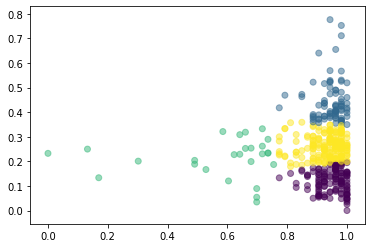

In [15]:
#분포도 시각화
plt.scatter(r['행정동별은행분포'],r['TargetA밀도'],c=r['predict_a4'],alpha=0.5)


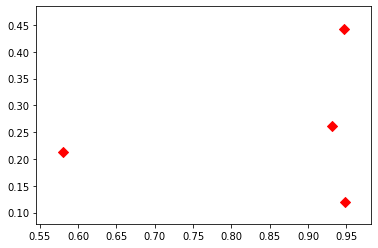

In [16]:
#중심표시
centers = pd.DataFrame(kMeans.cluster_centers_,columns=['행정동별은행분포','TargetA밀도'])
center_x = centers['행정동별은행분포']
center_y = centers['TargetA밀도']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

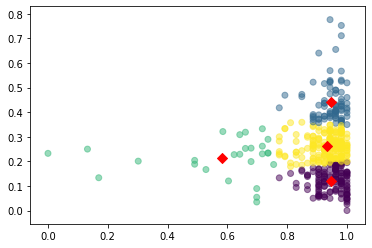

In [17]:
#분포도에 중심표시
plt.scatter(r['행정동별은행분포'],r['TargetA밀도'],c=r['predict_a4'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

In [18]:
centers = kMeans.cluster_centers_
print(centers)

[[0.94762264 0.12053196]
 [0.94669811 0.44320335]
 [0.58055152 0.21353453]
 [0.93166487 0.26129705]]


In [19]:
data = pd.merge(df_은행, r, on=["행정동별은행분포", "TargetA밀도"])

In [20]:
data = data[['행정동코드', '구', '동', 'predict_a4']]
#data

In [21]:
#주의 : 타겟이 무엇인지 위의 중심점 좌표를 보고 바꿀것(돌릴떄마다 바뀜...)
data['target_a4'] = (data['predict_a4'] == 1 ).astype(int)


In [22]:
#data

In [23]:
data_a = data[['행정동코드', '구', '동', 'target_a4']]

In [24]:
data_a.to_excel("target_a4.xlsx", encoding='utf-8')

## 시각화

In [25]:
#지도 코드
import pandas as pd
import folium

max_data = max(data['predict_a4']) #이것처럼 생활인구면 max(data['행정동별생활인구합계']), 연금이면 max(data['행정동별연금합계']) 이렇게 지정해주세요.

geo_data = 'complete_seoul-dong.geojson' #경로는 geojson 있는데로 바꿔주세요.

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, tiles = 'cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=data,
    columns=('행정동코드', 'predict_a4'),
    key_on='feature.properties.행정동코드',
    fill_color='YlGn',
    bins=[(-0.000000001)*max_data, 0.25*max_data, 0.5*max_data, 0.75*max_data, (1.000001)*max_data],
    legend_name='서울 행정동별 TargetA와 은행분포 비교', #자기 데이터 제목
    highlight = True,
).add_to(m)

folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['동'],
        
    aliases=['위치:'])
)

m.save('서울 행정동별 TargetA와 은행분포 비교4.html') #저장할 html 이름 지정
#소득.html 열어서 확인


In [26]:
X_b = df_은행[["행정동별은행분포","TargetB밀도"]]
#X_b

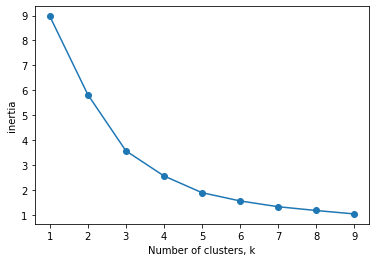

In [27]:
# Inertia value를 이용한 적정 군집수 판단

ks = range(1,10) # 1부터 10까지의 군집을 가지고 있을때

inertias = []



for k in ks:

    kMeans = KMeans(n_clusters=k)

    kMeans.fit(X_b)

    inertias.append(kMeans.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show() 


In [28]:
#k=4로 설정
kMeans = KMeans(n_clusters=4,algorithm='auto')
kMeans.fit(X_b)

y_kmed = kMeans.fit_predict(X_b)

predict_b4 = pd.DataFrame(kMeans.predict(X_b))
predict_b4.columns=['predict_b4']

In [29]:
kMeans.inertia_

2.5606278725799054

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X_b, y_kmed)
print(silhouette_avg)

0.4393730562911228


In [31]:
sample_silhouette_values = silhouette_samples(X_b, y_kmed)
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.4792648921542737
0.3823875574358818
0.3682198774750035
0.6337582979369841


In [32]:
r = pd.concat([X_b,predict_b4],axis=1)
#r

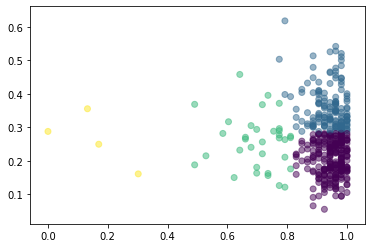

In [33]:
#분포도 시각화
plt.scatter(r['행정동별은행분포'],r['TargetB밀도'],c=r['predict_b4'],alpha=0.5)


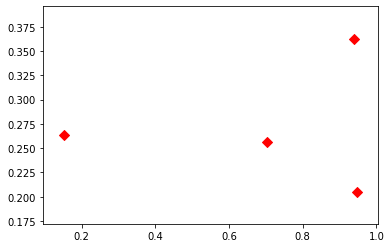

In [34]:
#중심표시
centers = pd.DataFrame(kMeans.cluster_centers_,columns=['행정동별은행분포','TargetB밀도'])
center_x = centers['행정동별은행분포']
center_y = centers['TargetB밀도']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

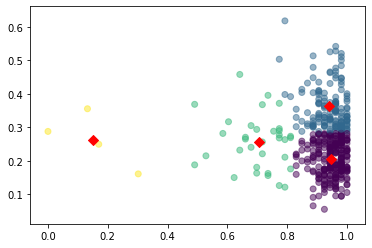

In [35]:
#분포도에 중심표시
plt.scatter(r['행정동별은행분포'],r['TargetB밀도'],c=r['predict_b4'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

In [36]:
centers = kMeans.cluster_centers_
print(centers)

[[0.94718528 0.20525799]
 [0.93967579 0.36287269]
 [0.70421754 0.25644529]
 [0.1509434  0.26345986]]


In [39]:
data = pd.merge(df_은행, r, on=["행정동별은행분포", "TargetB밀도"])

In [42]:
data = data[['행정동코드', '구', '동', 'predict_b4']]
#data

In [43]:
#주의 : 타겟이 무엇인지 위의 중심점 좌표를 보고 바꿀것(돌릴떄마다 바뀜...)
data['target_b4'] = (data['predict_b4'] == 1 ).astype(int)


In [44]:
#data

In [45]:
data.columns

Index(['행정동코드', '구', '동', 'predict_b4', 'target_b4'], dtype='object')

In [46]:
data_b = data[['행정동코드', '구', '동', 'target_b4']]

In [47]:
data_b.to_excel("target_b4.xlsx", encoding='utf-8')

## 시각화

In [48]:
#지도 코드
import pandas as pd
import folium

max_data = max(data['predict_b4']) #이것처럼 생활인구면 max(data['행정동별생활인구합계']), 연금이면 max(data['행정동별연금합계']) 이렇게 지정해주세요.

geo_data = 'complete_seoul-dong.geojson' #경로는 geojson 있는데로 바꿔주세요.

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, tiles = 'cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=data,
    columns=('행정동코드', 'predict_b4'),
    key_on='feature.properties.행정동코드',
    fill_color='YlGn',
    bins=[(-0.000000001)*max_data, 0.25*max_data, 0.5*max_data, 0.75*max_data, (1.000001)*max_data],
    legend_name='서울 행정동별 TargetB와 은행분포 비교', #자기 데이터 제목
    highlight = True,
).add_to(m)

folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['동'],
    aliases=['위치:'])
)

m.save('서울 행정동별 TargetB와 은행분포 비교4.html') #저장할 html 이름 지정
#소득.html 열어서 확인
